In [1]:
!pip install numpy pandas tensorflow


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
dataset = pd.read_csv('Exp_Mn_Mw_Value.txt', sep='\t')

In [5]:
X = dataset.iloc[:, 1:5].values   # columns 1–4: Factor A–D
y = dataset.iloc[:, 5:7].values   # columns 5–6: Responses Mn, Mw

In [6]:
dataset.head()

,Run,Factor A,Factor B,Factor C,Factor D,Response 1 (Experimental),Response 2 (Experimental)
0,1,110,7,50,10,1127.19,1321.65
1,2,85,13,50,10,1024.97,1339.35
2,3,101,1,500,60,1950.00,2878.90
3,4,101,1,500,60,2223.17,2989.00
4,5,50,10,50,10,1845.60,2690.50


In [7]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, shuffle=True, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [10]:
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # define the input shape here
model.add(Dense(18, activation='tanh',
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(2))  # 2 outputs: Mn, Mw

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [12]:
print(X_train.shape)  # (samples, features)
print(y_train.shape)  # (samples, 2)

(19, 4)
(19, 2)


In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=4,
                    validation_data=(X_val, y_val), callbacks=[early_stop], shuffle=True)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8390072.0000 - mae: 2677.6465 - val_loss: 13288739.0000 - val_mae: 3496.1702
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8389509.0000 - mae: 2677.5439 - val_loss: 13288035.0000 - val_mae: 3496.0693
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8388954.0000 - mae: 2677.4431 - val_loss: 13287335.0000 - val_mae: 3495.9690
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8388430.5000 - mae: 2677.3406 - val_loss: 13286620.0000 - val_mae: 3495.8672
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8387864.5000 - mae: 2677.2385 - val_loss: 13285917.0000 - val_mae: 3495.7664
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8387332.0000 - mae: 2677.1372 - val_loss: 13285213.0000 - val_mae: 3495.6653
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8386790.0000 - mae: 2677.0352 - val_loss: 13284505.0000 - val_mae: 3495.5642
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 83862

In [21]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
MSE: 10398864.531862661
MAE: 2814.4664622751875
R2 : -3.9714550016729535


In [22]:
comparison = np.hstack((y_test, y_pred))
print("Actual Mn, Actual Mw, Predicted Mn, Predicted Mw:")
print(comparison)

Actual Mn, Actual Mw, Predicted Mn, Predicted Mw:
[[2298.62       2972.98         57.20339966   59.85028076]
 [3762.88       5752.81         57.21730042   59.86476517]
 [1127.19       1321.65         56.29529572   58.90018463]]


In [23]:
!pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from sklearn.metrics import mean_squared_error


In [26]:
transfer_functions = {
    'tanh': 'Tansig',
    'sigmoid': 'Logsig',
    'linear': 'Purelin',
    'relu': 'Radbas'
}

In [27]:
mse_results = []

In [28]:
# Loop over activation functions
for activation, name in transfer_functions.items():
    # Build the model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(2, activation='linear'))  # 2 outputs: Mn & Mw

    # Compile the model
    model.compile(optimizer=Adam(), loss='mse')

    # Train the model
    model.fit(X_train, y_train,
              batch_size=32,
              epochs=25,
              validation_data=(X_val, y_val),
              verbose=0,
              shuffle=True)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate MSE only for Mw (second column)
    mse_mw = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    mse_results.append(mse_mw)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


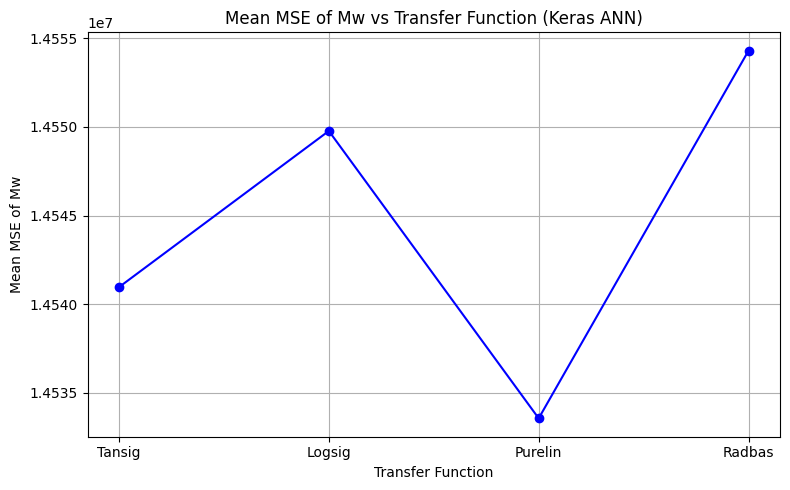

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(list(transfer_functions.values()), mse_results, marker='o', linestyle='-', color='blue')
plt.title('Mean MSE of Mw vs Transfer Function (Keras ANN)')
plt.xlabel('Transfer Function')
plt.ylabel('Mean MSE of Mw')
plt.grid(True)
plt.tight_layout()
plt.show()